In [2]:
from bigdl.util.common import *
from image import *
import cv2
import numpy as np
from IPython.display import Image, display
JavaCreator.set_creator_class("com.intel.analytics.zoo.transform.pythonapi.PythonDlFeature")
init_engine()

creating: createColorJitter


/tmp/spark-82d44efc-e3bb-4868-b3f7-1651a262ff3f/userFiles-024adebb-1120-4b9a-9366-d110cc8dbeea/DLfeature-core_2.11-0.1-SNAPSHOT-python-api.zip/image.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


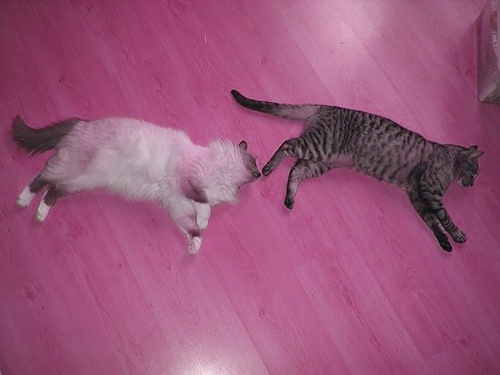

In [2]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
color = ColorJitter(random_order_prob=1.0, shuffle=True)
out = color.transform(image, image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createResize


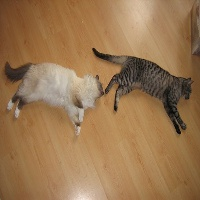

In [3]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
resize = Resize(200, 200, 1)
out = resize.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createCrop


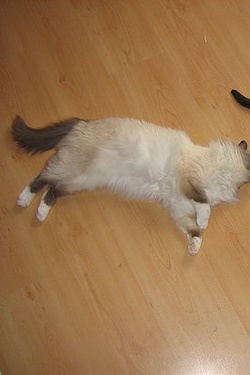

In [12]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
crop = Crop(True, [0.0, 0.0, 0.5, 1.0])
out = crop.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createCenterCrop


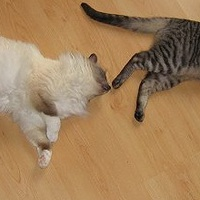

In [13]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
crop = CenterCrop(200, 200)
out = crop.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createRandomCrop


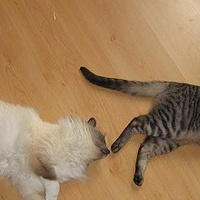

In [15]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
crop = RandomCrop(200, 200)
out = crop.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createExpand


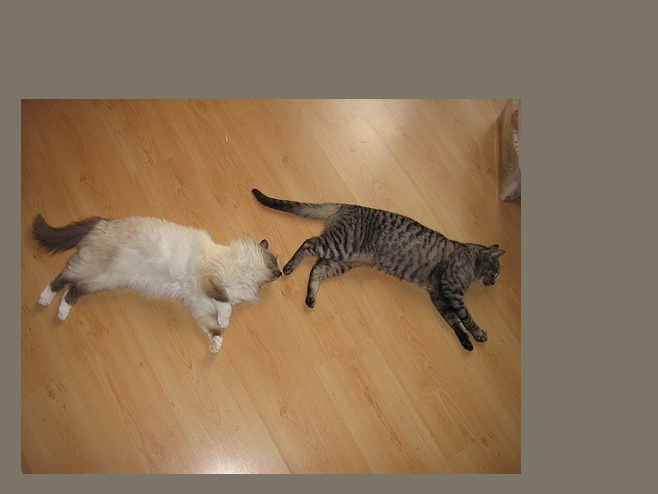

In [5]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
transformer = Expand(means_r=123, means_g=117, means_b=104,
                 max_expand_ratio=2.0)
out = transformer.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createHFlip


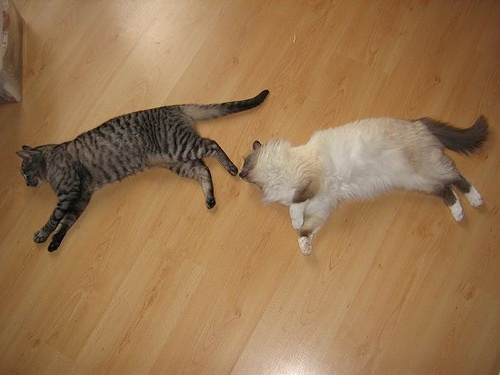

In [7]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
transformer = HFlip()
out = transformer.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createColorJitter
creating: createHFlip
creating: createResize


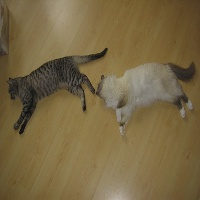

In [6]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
transformer = ColorJitter() + HFlip() + Resize(200, 200, 1)
out = transformer.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

creating: createHFlip
creating: createRandomTransformer


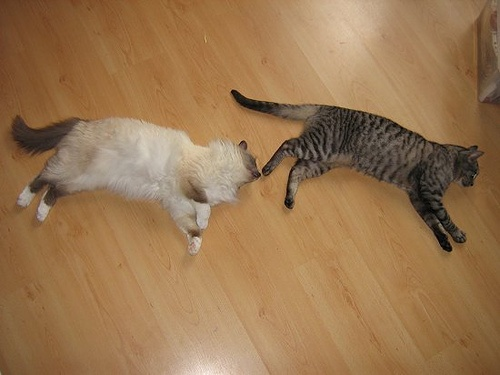

In [8]:
image = cv2.imread('/home/jxy/data/test/000019.jpg')
transformer = RandomTransformer(HFlip(), 0.5)
out = transformer.transform(image)
cv2.imwrite('/tmp/tmp.jpg', out)
display(Image(filename='/tmp/tmp.jpg'))

In [8]:
folder = "/home/jxy/data/test"
imageFiles = os.listdir(folder)
images = []
for f in imageFiles:
    image = cv2.imread(folder + '/' + f)
    images.append(image)
img_rdd = sc.parallelize(images)
transformer = ColorJitter() + HFlip() + Resize(200, 200, 1)
out = transformer(img_rdd)
print img_rdd.count()

creating: createColorJitter
creating: createHFlip
creating: createResize
8
